In [72]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


In [73]:
# Load the comprehensive merged dataset
df = pd.read_csv('../data/merged_comprehensive_data.csv')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Date Range: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"\nColumns ({len(df.columns)}):")
print(df.columns.tolist())

Dataset Shape: 109,620 rows × 19 columns
Date Range: 2020-01-01 to 2024-12-31

Columns (19):
['Date', 'market', 'item', 'price', 'volume_MT', 'temperature_avg_C', 'temperature_min_C', 'temperature_max_C', 'rainfall_mm', 'humidity_percent', 'wind_speed_kmh', 'season', 'cultivation_season', 'harvest_period_rice', 'vegetable_peak_season', 'is_public_holiday', 'is_day_before_holiday', 'near_major_holiday', 'demand_multiplier']


In [74]:
# Display first few rows
print("SAMPLE DATA (First 5 rows)")
df.head()

SAMPLE DATA (First 5 rows)


,Date,market,item,price,volume_MT,temperature_avg_C,temperature_min_C,temperature_max_C,rainfall_mm,humidity_percent,wind_speed_kmh,season,cultivation_season,harvest_period_rice,vegetable_peak_season,is_public_holiday,is_day_before_holiday,near_major_holiday,demand_multiplier
0,2020-01-01,Ampara,Beetroot,196.95,4.00,27.5,22.3,32.9,2.5,76.9,23.2,Northeast Monsoon,Maha,0,1,0,0,0,1.0
1,2020-01-01,Ampara,Raddish,77.65,3.06,27.5,22.3,32.9,2.5,76.9,23.2,Northeast Monsoon,Maha,0,1,0,0,0,1.0
2,2020-01-01,Ampara,Red Onion,313.31,6.32,27.5,22.3,32.9,2.5,76.9,23.2,Northeast Monsoon,Maha,0,1,0,0,0,1.0
3,2020-01-01,Ampara,Rice,164.41,35.04,27.5,22.3,32.9,2.5,76.9,23.2,Northeast Monsoon,Maha,0,1,0,0,0,1.0
4,2020-01-01,Anuradhapura,Beetroot,139.25,6.30,27.5,22.3,32.9,2.5,76.9,23.2,Northeast Monsoon,Maha,0,1,0,0,0,1.0


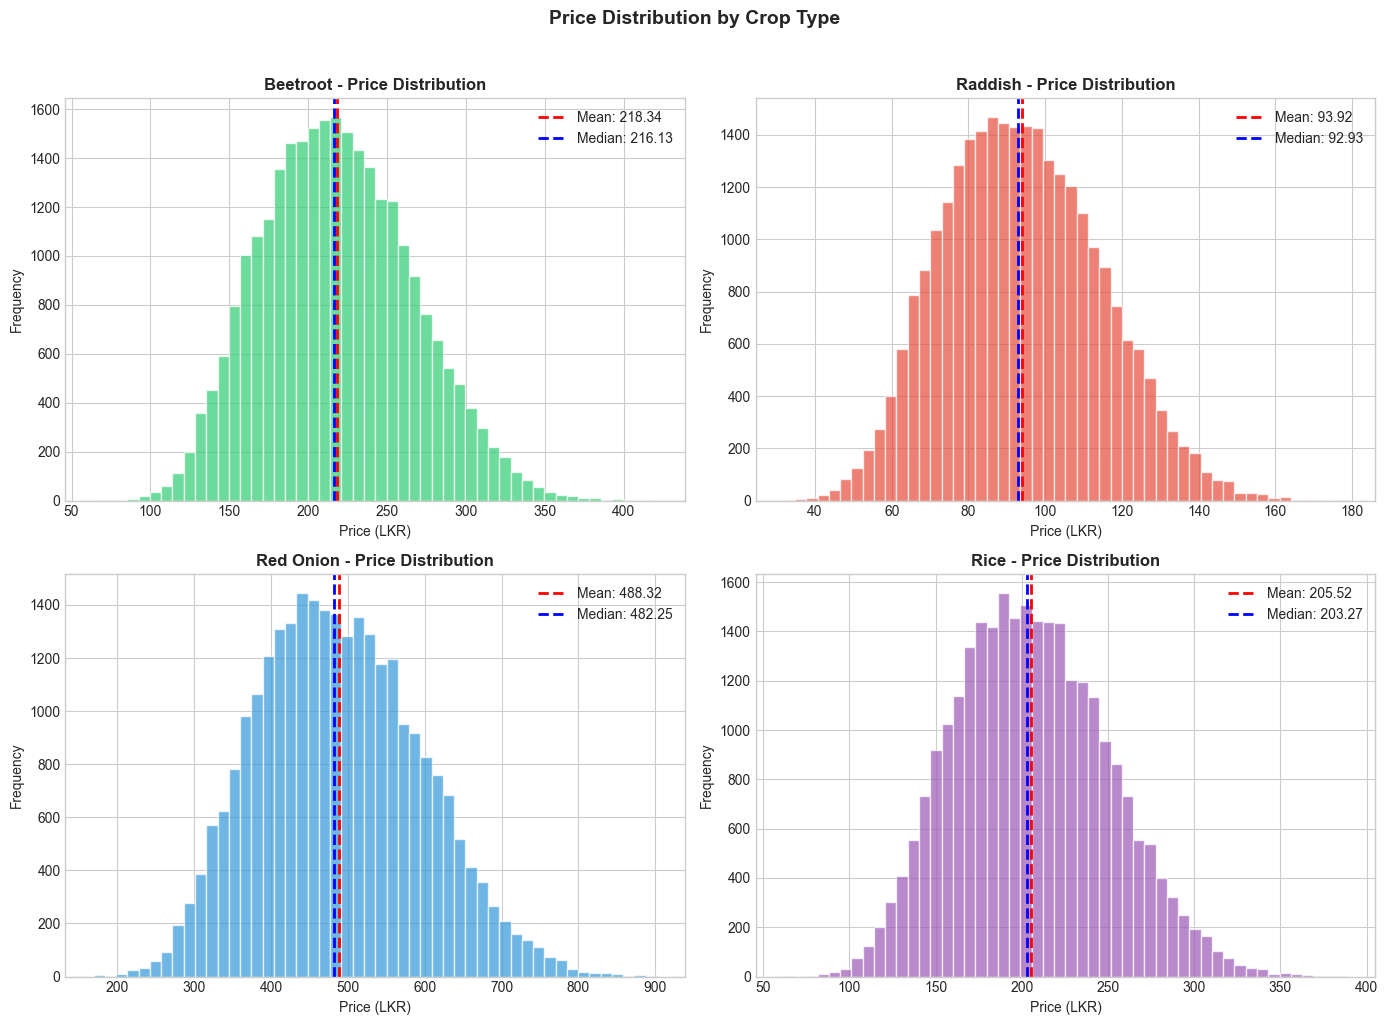

In [75]:
# Price distribution by crop
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

crops = df['item'].unique()
colors = ['#2ecc71', '#e74c3c', '#3498db', '#9b59b6']

for idx, (crop, color) in enumerate(zip(crops, colors)):
    ax = axes[idx // 2, idx % 2]
    crop_data = df[df['item'] == crop]['price']
    
    ax.hist(crop_data, bins=50, color=color, alpha=0.7, edgecolor='white')
    ax.axvline(crop_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {crop_data.mean():.2f}')
    ax.axvline(crop_data.median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {crop_data.median():.2f}')
    
    ax.set_title(f'{crop} - Price Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel('Price (LKR)')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.suptitle('Price Distribution by Crop Type', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

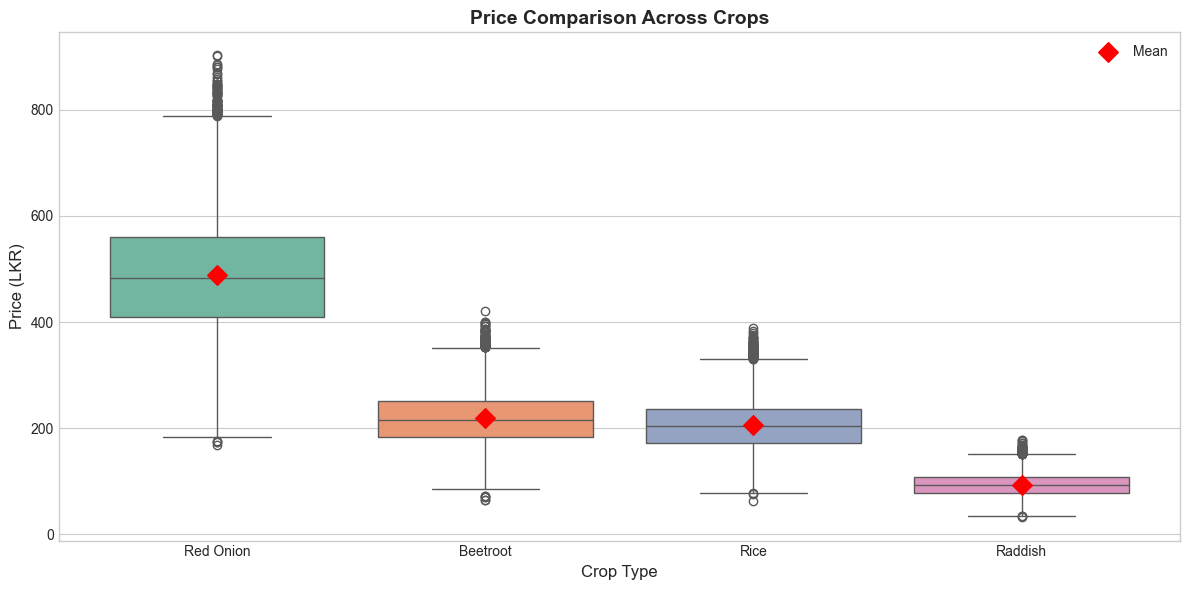

In [76]:
# Box plot comparison of prices across crops
fig, ax = plt.subplots(figsize=(12, 6))

crop_order = df.groupby('item')['price'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='item', y='price', order=crop_order, palette='Set2', ax=ax)

ax.set_title('Price Comparison Across Crops', fontsize=14, fontweight='bold')
ax.set_xlabel('Crop Type', fontsize=12)
ax.set_ylabel('Price (LKR)', fontsize=12)

# Add mean markers
means = df.groupby('item')['price'].mean().reindex(crop_order)
for i, mean in enumerate(means):
    ax.scatter(i, mean, color='red', s=100, zorder=5, marker='D', label='Mean' if i == 0 else '')

plt.legend()
plt.tight_layout()
plt.show()

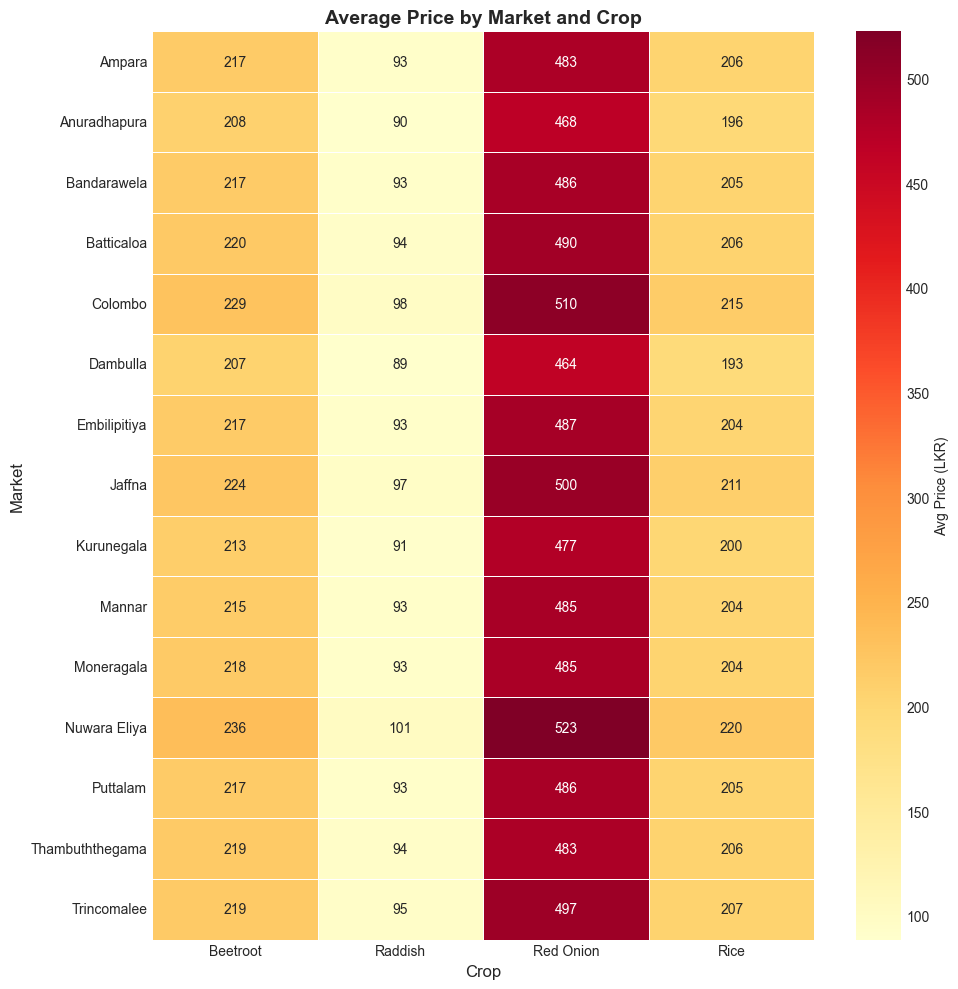

In [77]:
# Heatmap: Average price by Market and Crop
pivot_price = df.pivot_table(values='price', index='market', columns='item', aggfunc='mean')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pivot_price, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax, 
            linewidths=0.5, cbar_kws={'label': 'Avg Price (LKR)'})

ax.set_title('Average Price by Market and Crop', fontsize=14, fontweight='bold')
ax.set_xlabel('Crop', fontsize=12)
ax.set_ylabel('Market', fontsize=12)

plt.tight_layout()
plt.show()

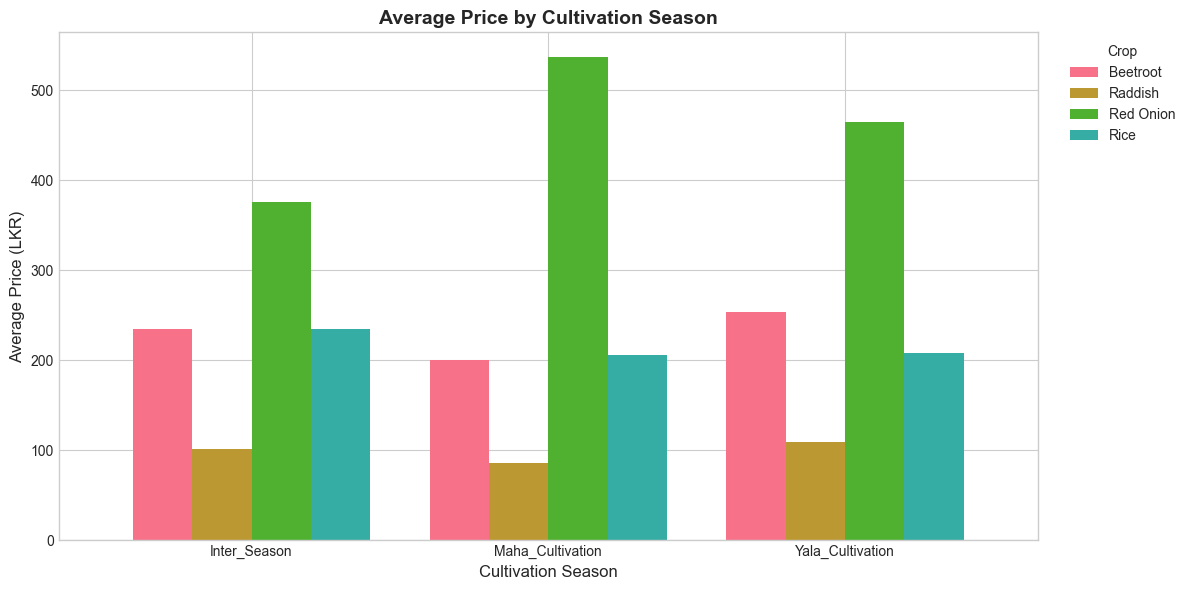

In [ ]:
# Price by cultivation season
fig, ax = plt.subplots(figsize=(12, 6))

season_prices = df.groupby(['cultivation_season', 'item'])['price'].mean().unstack()
season_prices.plot(kind='bar', ax=ax, width=0.8)

ax.set_title('Average Price by Cultivation Season', fontsize=14, fontweight='bold')
ax.set_xlabel('Cultivation Season', fontsize=12)
ax.set_ylabel('Average Price (LKR)', fontsize=12)
ax.legend(title='Crop', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

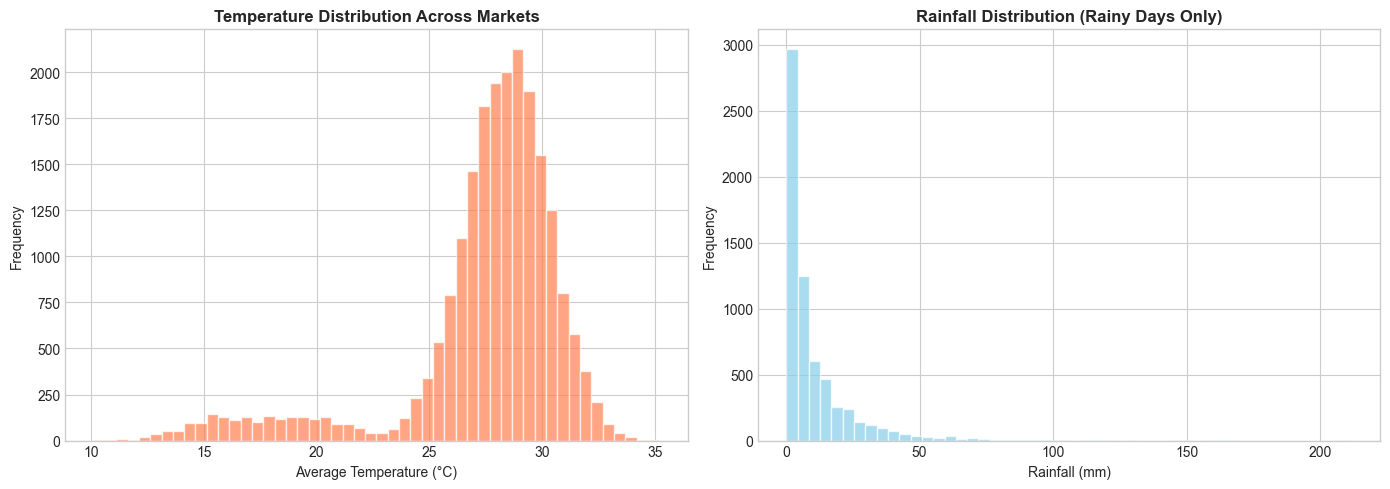

Days with rain: 6,472 (30.2%)
Average rainfall on rainy days: 10.6 mm


In [ ]:
# Temperature vs Price
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Temperature distribution
axes[0].hist(df['temperature_avg_C'], bins=50, color='coral', alpha=0.7, edgecolor='white')
axes[0].set_title('Temperature Distribution Across Markets', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Average Temperature (°C)')
axes[0].set_ylabel('Frequency')

# Rainfall distribution
rain_data = df[df['rainfall_mm'] > 0]['rainfall_mm']
axes[1].hist(rain_data, bins=50, color='skyblue', alpha=0.7, edgecolor='white')
axes[1].set_title('Rainfall Distribution (Rainy Days Only)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Rainfall (mm)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Days with rain: {(df['rainfall_mm'] > 0).sum():,} ({(df['rainfall_mm'] > 0).mean()*100:.1f}%)")
print(f"Average rainfall on rainy days: {rain_data.mean():.1f} mm")

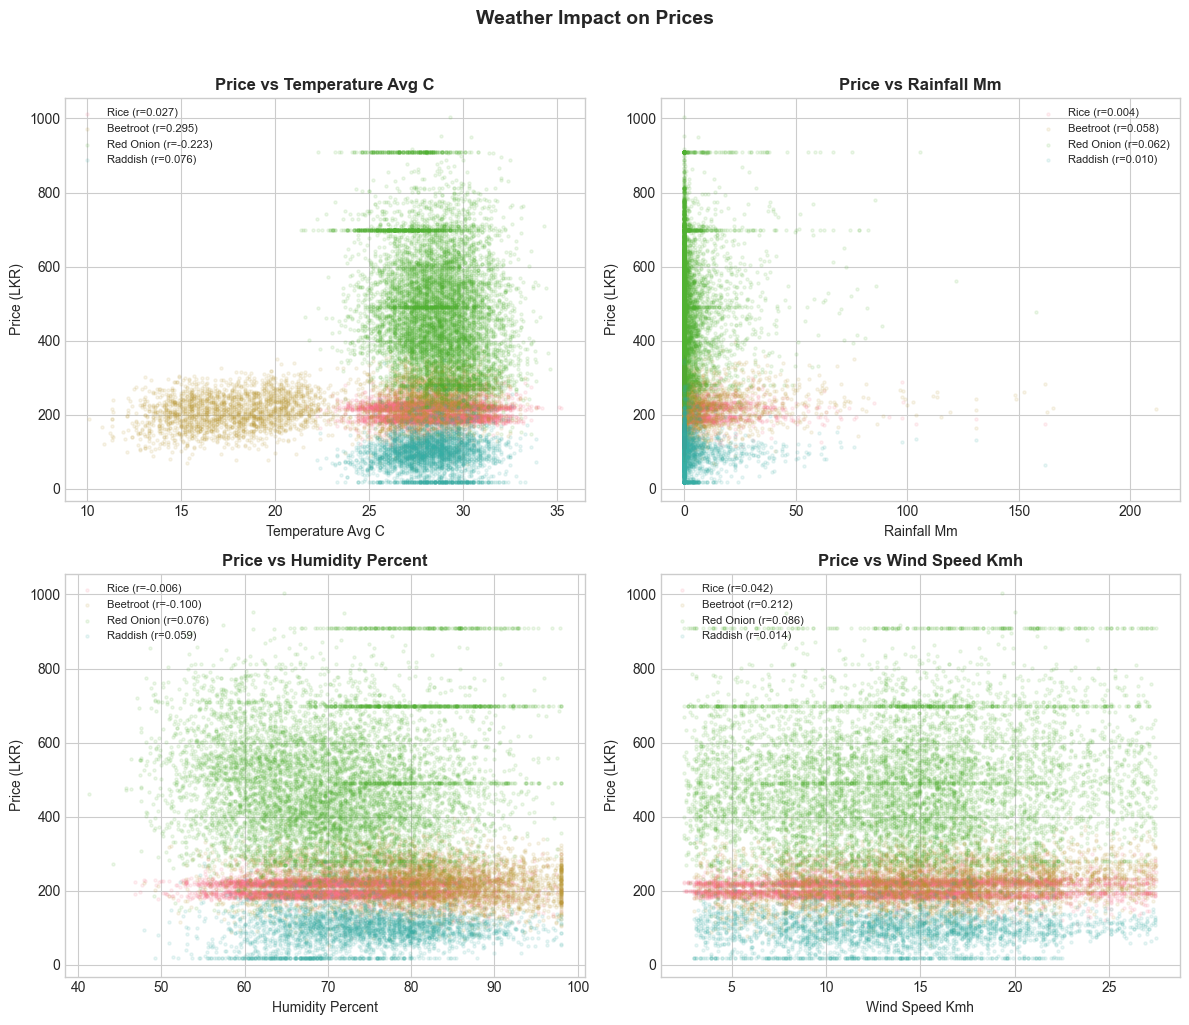

In [ ]:
# Weather correlations with price
weather_cols = ['temperature_avg_C', 'rainfall_mm', 'humidity_percent', 'wind_speed_kmh']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for idx, col in enumerate(weather_cols):
    ax = axes[idx // 2, idx % 2]
    
    for crop in df['item'].unique():
        crop_data = df[df['item'] == crop]
        corr = crop_data['price'].corr(crop_data[col])
        ax.scatter(crop_data[col], crop_data['price'], alpha=0.1, s=5, label=f'{crop} (r={corr:.3f})')
    
    ax.set_title(f'Price vs {col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel('Price (LKR)')
    ax.legend(fontsize=8)

plt.suptitle('Weather Impact on Prices', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

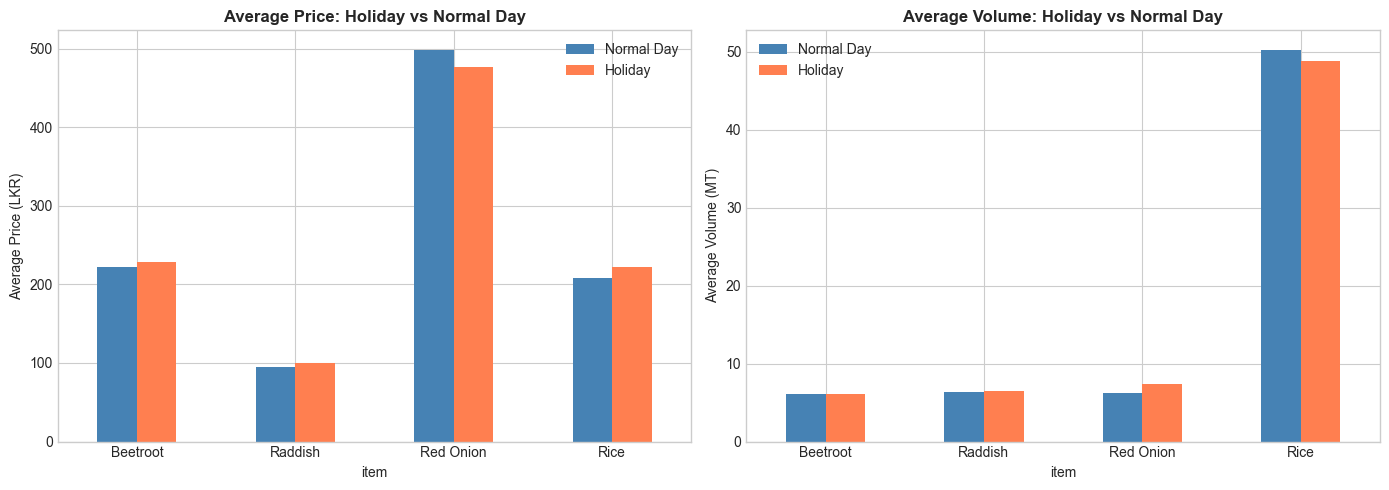

In [ ]:
# Price comparison: Holiday vs Non-Holiday
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Price on holidays vs normal days
holiday_comparison = df.groupby(['item', 'is_public_holiday'])['price'].mean().unstack()
holiday_comparison.columns = ['Normal Day', 'Holiday']
holiday_comparison.plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
axes[0].set_title('Average Price: Holiday vs Normal Day', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Average Price (LKR)')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='')

# Volume on holidays vs normal days
volume_comparison = df.groupby(['item', 'is_public_holiday'])['volume_MT'].mean().unstack()
volume_comparison.columns = ['Normal Day', 'Holiday']
volume_comparison.plot(kind='bar', ax=axes[1], color=['steelblue', 'coral'])
axes[1].set_title('Average Volume: Holiday vs Normal Day', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Volume (MT)')
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='')

plt.tight_layout()
plt.show()

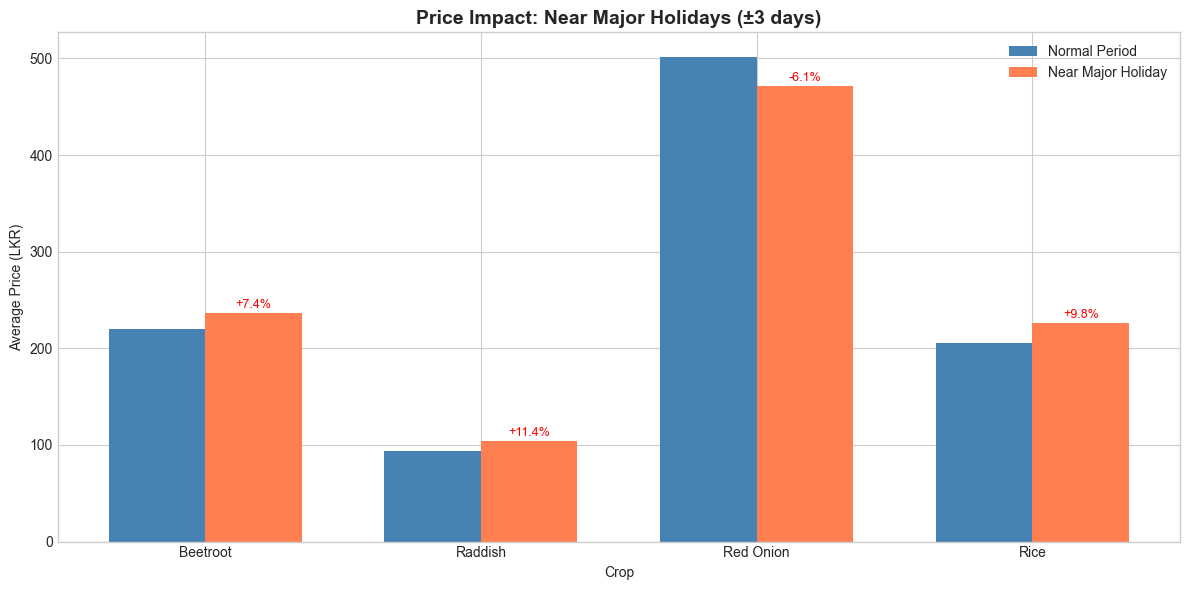

In [ ]:
# Impact of being near a major holiday
fig, ax = plt.subplots(figsize=(12, 6))

near_holiday_effect = df.groupby(['item', 'near_major_holiday'])['price'].mean().unstack()
near_holiday_effect.columns = ['Normal Period', 'Near Major Holiday']

x = np.arange(len(near_holiday_effect.index))
width = 0.35

bars1 = ax.bar(x - width/2, near_holiday_effect['Normal Period'], width, label='Normal Period', color='steelblue')
bars2 = ax.bar(x + width/2, near_holiday_effect['Near Major Holiday'], width, label='Near Major Holiday', color='coral')

ax.set_xlabel('Crop')
ax.set_ylabel('Average Price (LKR)')
ax.set_title('Price Impact: Near Major Holidays (±3 days)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(near_holiday_effect.index)
ax.legend()

# Add percentage change labels
for i, (normal, holiday) in enumerate(zip(near_holiday_effect['Normal Period'], near_holiday_effect['Near Major Holiday'])):
    pct_change = ((holiday - normal) / normal) * 100
    ax.annotate(f'{pct_change:+.1f}%', xy=(i + width/2, holiday + 5), ha='center', fontsize=9, color='red')

plt.tight_layout()
plt.show()

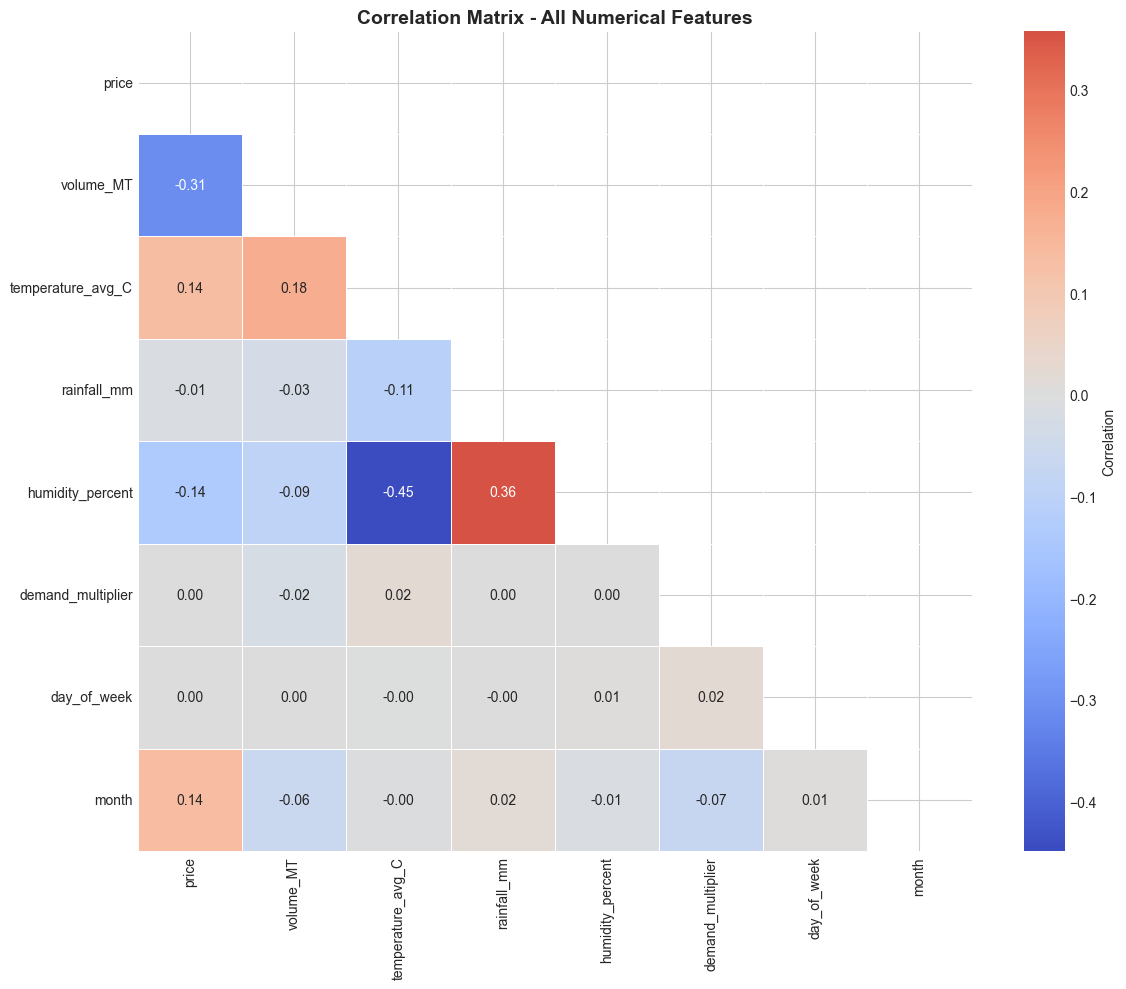

In [ ]:
# Overall correlation heatmap
numeric_cols = ['price', 'volume_MT', 'temperature_avg_C', 'rainfall_mm', 'humidity_percent', 
                 'demand_multiplier', 'day_of_week', 'month']

corr_matrix = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=ax, linewidths=0.5, cbar_kws={'label': 'Correlation'})

ax.set_title('Correlation Matrix - All Numerical Features', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

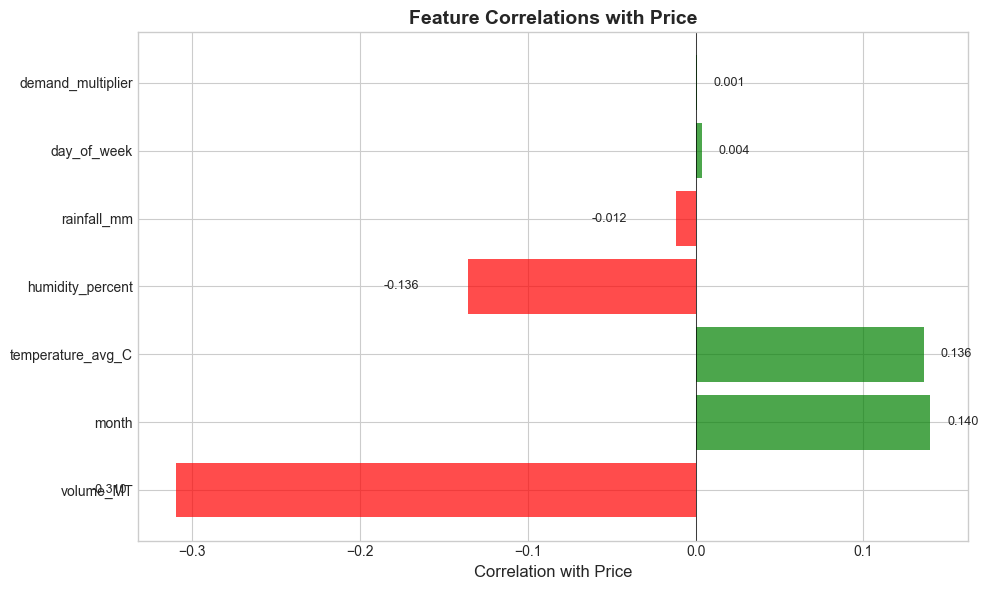

In [ ]:
# Top correlations with price
price_corr = df[numeric_cols].corr()['price'].drop('price').sort_values(key=abs, ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in price_corr.values]
bars = ax.barh(price_corr.index, price_corr.values, color=colors, alpha=0.7)

ax.axvline(x=0, color='black', linewidth=0.5)
ax.set_xlabel('Correlation with Price', fontsize=12)
ax.set_title('Feature Correlations with Price', fontsize=14, fontweight='bold')

# Add value labels
for bar, val in zip(bars, price_corr.values):
    ax.text(val + 0.01 if val > 0 else val - 0.05, bar.get_y() + bar.get_height()/2, 
            f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [81]:
# Create feature-engineered dataset for modeling
df_model = df.copy()

# Add lag features for price (previous day, week)
for crop in df_model['item'].unique():
    for market in df_model[df_model['item'] == crop]['market'].unique():
        mask = (df_model['item'] == crop) & (df_model['market'] == market)
        df_model.loc[mask, 'price_lag_1'] = df_model.loc[mask, 'price'].shift(1)
        df_model.loc[mask, 'price_lag_7'] = df_model.loc[mask, 'price'].shift(7)
        df_model.loc[mask, 'price_rolling_7_mean'] = df_model.loc[mask, 'price'].rolling(7).mean()
        df_model.loc[mask, 'volume_lag_1'] = df_model.loc[mask, 'volume_MT'].shift(1)

# Drop rows with NaN from lag features
df_model_clean = df_model.dropna(subset=['price_lag_1', 'price_lag_7', 'price_rolling_7_mean'])


# Save for modeling
df_model_clean.to_csv('../data/model_ready_data.csv', index=False)
